<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise52_PowerConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import io
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from google.colab import files

In [103]:
uploaded=files.upload()

In [104]:
df_original=pd.read_csv("power_consumption_data.csv")
df_original.head(5)


,Date,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power
0,2018-05-01,0.418,234.84,18.4,0,1,17,4.216
1,2018-05-02,0.436,233.63,23.0,0,1,16,5.360
2,2018-05-03,0.498,233.29,23.0,0,2,17,5.374
3,2018-05-04,0.502,233.74,23.0,0,1,17,5.388
4,2018-05-05,0.528,235.68,15.8,0,1,17,3.666


In [105]:
print(df_original.isnull().sum())
print(df_original.dtypes)

Date                     0
Global Reactive Power    0
Voltage                  0
Global Intensity         0
Sub_Metering_1           0
Sub_Metering_2           0
Sub_Metering_3           0
Global Active Power      0
dtype: int64
Date                      object
Global Reactive Power    float64
Voltage                  float64
Global Intensity         float64
Sub_Metering_1             int64
Sub_Metering_2             int64
Sub_Metering_3             int64
Global Active Power      float64
dtype: object


In [106]:
df=df_original
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power
0,2018-05-01,0.418,234.84,18.4,0,1,17,4.216
1,2018-05-02,0.436,233.63,23.0,0,1,16,5.360
2,2018-05-03,0.498,233.29,23.0,0,2,17,5.374
3,2018-05-04,0.502,233.74,23.0,0,1,17,5.388
4,2018-05-05,0.528,235.68,15.8,0,1,17,3.666


In [107]:
df.dtypes

Date                     datetime64[ns]
Global Reactive Power           float64
Voltage                         float64
Global Intensity                float64
Sub_Metering_1                    int64
Sub_Metering_2                    int64
Sub_Metering_3                    int64
Global Active Power             float64
dtype: object

In [108]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df=df.drop('Date',axis=1)
df.head()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power,year,month,day
0,0.418,234.84,18.4,0,1,17,4.216,2018,5,1
1,0.436,233.63,23.0,0,1,16,5.360,2018,5,2
2,0.498,233.29,23.0,0,2,17,5.374,2018,5,3
3,0.502,233.74,23.0,0,1,17,5.388,2018,5,4
4,0.528,235.68,15.8,0,1,17,3.666,2018,5,5


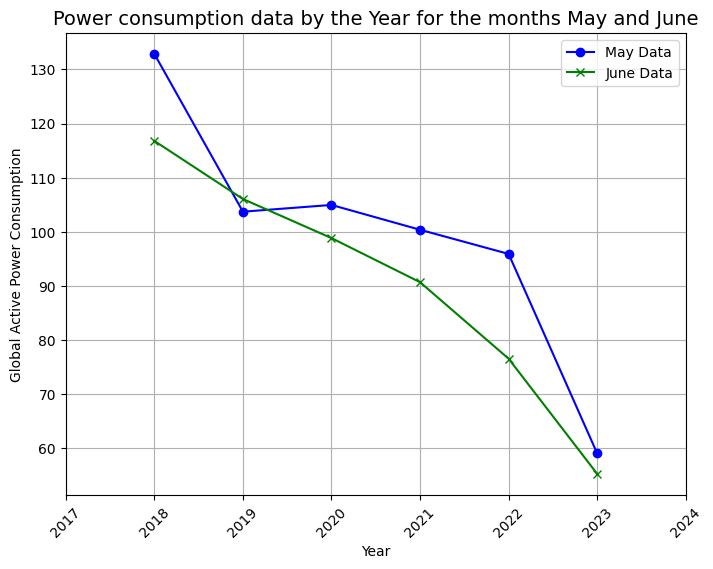

In [109]:
may_data = df[df['month'] == 5]
june_data = df[df['month'] == 6]
power_per_year_may = may_data.groupby('year')['Global Active Power'].sum()
power_per_year_june = june_data.groupby('year')['Global Active Power'].sum()
plt.figure(figsize=(8, 6))
plt.plot(power_per_year_may.index, power_per_year_may.values, marker='o', color = 'blue', label = 'May Data')
plt.plot(power_per_year_june.index, power_per_year_june.values, marker='x', color = 'green', label = 'June Data')
plt.title('Power consumption data by the Year for the months May and June', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Global Active Power Consumption')
x_tick_range = range(2017,2025,1)
plt.xticks(x_tick_range, rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

In [110]:
data = df
#Month and Day cyclic encoding
data['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
colum = ['month','day']
data=data.drop(columns=colum)
data.head()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power,year,month_sin,month_cos,day_sin,day_cos
0,0.418,234.84,18.4,0,1,17,4.216,2018,0.5,-0.866025,0.201299,0.979530
1,0.436,233.63,23.0,0,1,16,5.360,2018,0.5,-0.866025,0.394356,0.918958
2,0.498,233.29,23.0,0,2,17,5.374,2018,0.5,-0.866025,0.571268,0.820763
3,0.502,233.74,23.0,0,1,17,5.388,2018,0.5,-0.866025,0.724793,0.688967
4,0.528,235.68,15.8,0,1,17,3.666,2018,0.5,-0.866025,0.848644,0.528964


In [111]:
data.describe()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power,year,month_sin,month_cos,day_sin,day_cos
count,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,3.660000e+02,366.000000
mean,0.088038,235.874044,13.351913,0.0,1.478142,13.459016,3.116574,2020.500000,2.540984e-01,-0.931915,-1.698702e-17,-0.016393
std,0.100954,2.705787,4.247118,0.0,5.352589,6.810726,1.015347,1.710163,2.503086e-01,0.067070,7.138551e-01,0.702055
min,0.000000,230.980000,1.200000,0.0,0.000000,0.000000,0.284000,2018.000000,1.224647e-16,-1.000000,-9.987165e-01,-0.994869
25%,0.000000,233.630000,10.050000,0.0,0.000000,16.000000,2.428000,2019.000000,1.224647e-16,-1.000000,-7.247928e-01,-0.758758
50%,0.070000,235.645000,14.000000,0.0,0.000000,17.000000,3.302000,2020.500000,5.000000e-01,-0.866025,-2.449294e-16,-0.050649
75%,0.133500,237.687500,14.600000,0.0,1.000000,17.000000,3.421500,2022.000000,5.000000e-01,-0.866025,7.247928e-01,0.688967
max,0.528000,242.390000,33.200000,0.0,37.000000,18.000000,7.706000,2023.000000,5.000000e-01,-0.866025,9.987165e-01,1.000000


                       Global Reactive Power   Voltage  Global Intensity  \
Global Reactive Power               1.000000 -0.144296          0.257997   
Voltage                            -0.144296  1.000000         -0.719922   
Global Intensity                    0.257997 -0.719922          1.000000   
Sub_Metering_1                           NaN       NaN               NaN   
Sub_Metering_2                      0.131272 -0.186202          0.428465   
Sub_Metering_3                      0.126838 -0.738116          0.598247   
Global Active Power                 0.248578 -0.719471          0.996324   
year                               -0.262772  0.710956         -0.643735   
month_sin                           0.281939 -0.108941          0.087808   
month_cos                           0.281939 -0.108941          0.087808   
day_sin                             0.117676 -0.081821          0.065877   
day_cos                             0.014659  0.010659         -0.043763   

           

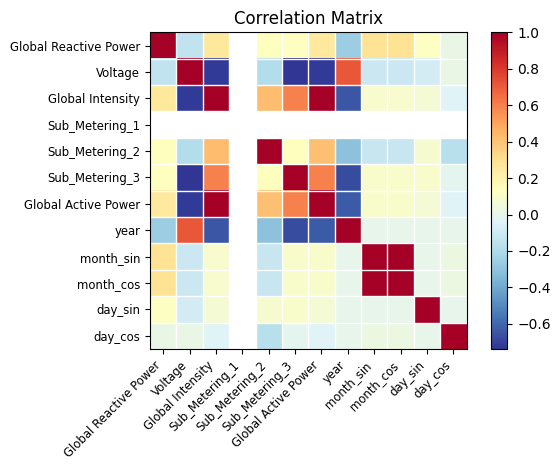

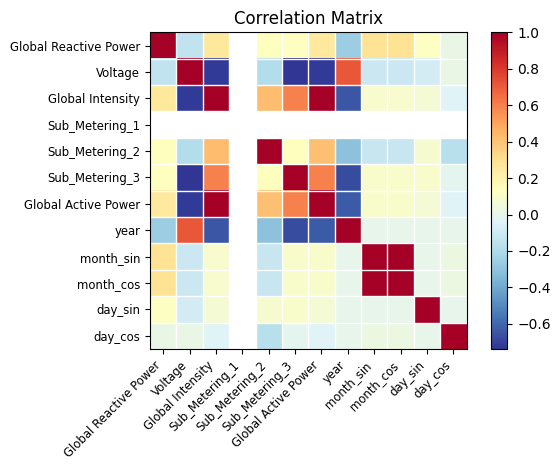

In [112]:
corr=data.corr()
print(corr)
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

In [113]:
X=data.drop('Global Active Power', axis=1)
y=data['Global Active Power']

In [114]:
model=lm.LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.06002248852569183
Root Mean Squared Error: 0.08348854078367873
R-squared: 0.9932202627106428


In [115]:
for i in range(-3,4):
  val=10**i
  svr_clf=SVR(kernel='linear',C=val)
  svr_clf.fit(X,y)
  y_pred=svr_clf.predict(X)

  mae = mean_absolute_error(y, y_pred)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  r2 = r2_score(y, y_pred)
  print(f"C = {val}")
  print(f'Mean Absolute Error: {mae}')
  print(f'RMSE: {rmse}')
  print(f'R-squared: {r2}')
  print("\n")

C = 0.001
Mean Absolute Error: 0.07824858051342991
RMSE: 0.10216830941055609
R-squared: 0.9898470665664492


C = 0.01
Mean Absolute Error: 0.06766411251989383
RMSE: 0.08694949303534075
R-squared: 0.9926465146273113


C = 0.1
Mean Absolute Error: 0.060090261186996445
RMSE: 0.0868378673146661
R-squared: 0.992665383310262


C = 1
Mean Absolute Error: 0.3292701149074996
RMSE: 0.42581194677387024
R-squared: 0.8236421447335222


C = 10
Mean Absolute Error: 2.888627643194893
RMSE: 3.8103825378282306
R-squared: -13.12200240119409


C = 100
Mean Absolute Error: 34.82659309840847
RMSE: 42.36702408280103
R-squared: -1744.8826286943784


C = 1000
Mean Absolute Error: 139.1039622929807
RMSE: 173.80083069009044
R-squared: -29379.746106691917




In [116]:
for i in range(-3,4):
  val1=10**i
  for j in range(-3,4):
    val2=10**j
    svr_clf=SVR(kernel='rbf',C=val1, gamma=val2)
    svr_clf.fit(X,y)
    y_pred=svr_clf.predict(X)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    if 0.90 <= r2 < 1.0:
      print(f"C = {val1}; Gamma={val2}")
      print(f'Mean Absolute Error: {mae}')
      print(f'Root Mean Squared Error: {rmse}')
      print(f'R-squared: {r2}')
      print("\n")
  val2=0

C = 1; Gamma=0.001
Mean Absolute Error: 0.08264167675582969
Root Mean Squared Error: 0.13168043211486774
R-squared: 0.9831344071995567


C = 1; Gamma=0.01
Mean Absolute Error: 0.05961669180414558
Root Mean Squared Error: 0.11612784925561716
R-squared: 0.9868830793872735


C = 1; Gamma=0.1
Mean Absolute Error: 0.0780358696894945
Root Mean Squared Error: 0.22226353039760058
R-squared: 0.9519497622137782


C = 10; Gamma=0.001
Mean Absolute Error: 0.06503184951876327
Root Mean Squared Error: 0.07652715946974839
R-squared: 0.9943037333427707


C = 10; Gamma=0.01
Mean Absolute Error: 0.0504097145341733
Root Mean Squared Error: 0.05868176356053313
R-squared: 0.9966506121625291


C = 10; Gamma=0.1
Mean Absolute Error: 0.05371664990121332
Root Mean Squared Error: 0.062559113528866
R-squared: 0.9961933732363865


C = 10; Gamma=1
Mean Absolute Error: 0.08861413682453141
Root Mean Squared Error: 0.0913155768666681
R-squared: 0.9918894770303722


C = 10; Gamma=10
Mean Absolute Error: 0.098764885681

In [117]:
svr_clf=SVR(kernel='rbf',C=1,gamma=0.1)
svr_clf.fit(X,y)
y_pred=svr_clf.predict(X)
print("R Squared: ", r2_score(y,y_pred))

R Squared:  0.9519497622137782


In [118]:
uploaded=files.upload()

In [119]:
df1=pd.read_csv("power_forecast.csv")
df1['Date']=pd.to_datetime(df1['Date'])
df1=df1.dropna()
print(df1.dtypes)
print(df1.isnull().sum())


Date                     datetime64[ns]
Global Reactive Power           float64
Voltage                         float64
Global Intensity                float64
Sub_Metering_1                    int64
Sub_Metering_2                    int64
Sub_Metering_3                    int64
dtype: object
Date                     0
Global Reactive Power    0
Voltage                  0
Global Intensity         0
Sub_Metering_1           0
Sub_Metering_2           0
Sub_Metering_3           0
dtype: int64


In [120]:
df1['year'] = df1['Date'].dt.year
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day
df1=df1.drop('Date',axis=1)

df1.head()


,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,year,month,day
0,0.346,242.21,6.4,0,1,18,2024,5,1
1,0.348,242.42,6.4,0,2,18,2024,5,2
2,0.348,242.39,6.4,0,1,18,2024,5,3
3,0.346,242.07,6.4,0,1,17,2024,5,4
4,0.346,242.25,6.4,0,2,18,2024,5,5


In [121]:
forecast_data = df1
#Month and Day cyclic encoding
forecast_data['month_sin'] = np.sin(2 * np.pi * forecast_data['month'] / 12)
forecast_data['month_cos'] = np.cos(2 * np.pi * forecast_data['month'] / 12)
forecast_data['day_sin'] = np.sin(2 * np.pi * forecast_data['day'] / 31)
forecast_data['day_cos'] = np.cos(2 * np.pi * forecast_data['day'] / 31)
colum_ = ['month','day']
forecast_data=forecast_data.drop(columns=colum_)
forecast_data.head()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,year,month_sin,month_cos,day_sin,day_cos
0,0.346,242.21,6.4,0,1,18,2024,0.5,-0.866025,0.201299,0.979530
1,0.348,242.42,6.4,0,2,18,2024,0.5,-0.866025,0.394356,0.918958
2,0.348,242.39,6.4,0,1,18,2024,0.5,-0.866025,0.571268,0.820763
3,0.346,242.07,6.4,0,1,17,2024,0.5,-0.866025,0.724793,0.688967
4,0.346,242.25,6.4,0,2,18,2024,0.5,-0.866025,0.848644,0.528964


In [122]:
svr_clf=SVR(kernel='rbf',C=1,gamma=0.1)
svr_clf.fit(X,y)

y_pred_=svr_clf.predict(forecast_data)
print(y_pred_)

[3.26633745 3.30017551 3.29093246 3.24821839 3.27540726 3.17129876
 3.17474055 3.21654485 3.25192219 3.25467242 3.28680935 3.31462355
 3.28392586 3.33356805 3.36893369 3.32693512 3.24016511 3.25019836
 3.28549943 3.34239122 3.34071684 3.33948048 3.33696204 3.35254125
 3.35739079 3.36656826 3.31358495 3.29899499 3.27423091 3.25068836
 3.23378374 3.22976582 3.36039387 1.98947974 1.37827292 1.41674485
 1.42718743 1.36545736 1.84494679 1.18845826 1.03171984 1.0696597
 1.05719499 1.75178778 1.05290372 0.99279929 1.02900471 1.04726754
 1.07959254 1.6830494  1.0418891  1.05805085 1.07564029 1.17770912
 1.11703825 1.76749406 1.21213159 1.40682309 1.46652547 1.52542638
 1.5967948 ]


In [123]:
future_data1 = df1.drop(columns=['month_sin','month_cos','day_sin','day_cos'])
future_data1['Global Active Power'] = y_pred_
future_data1.head()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,year,month,day,Global Active Power
0,0.346,242.21,6.4,0,1,18,2024,5,1,3.266337
1,0.348,242.42,6.4,0,2,18,2024,5,2,3.300176
2,0.348,242.39,6.4,0,1,18,2024,5,3,3.290932
3,0.346,242.07,6.4,0,1,17,2024,5,4,3.248218
4,0.346,242.25,6.4,0,2,18,2024,5,5,3.275407


In [124]:
df= df.drop(columns=['month_sin','month_cos','day_sin','day_cos'])
df.head()

,Global Reactive Power,Voltage,Global Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3,Global Active Power,year,month,day
0,0.418,234.84,18.4,0,1,17,4.216,2018,5,1
1,0.436,233.63,23.0,0,1,16,5.360,2018,5,2
2,0.498,233.29,23.0,0,2,17,5.374,2018,5,3
3,0.502,233.74,23.0,0,1,17,5.388,2018,5,4
4,0.528,235.68,15.8,0,1,17,3.666,2018,5,5


In [126]:
may_data = df[df['month'] == 5]
june_data = df[df['month'] == 6]
may_data_future = future_data1[future_data1['month']==5]
june_data_future = future_data1[future_data1['month']==6]
power_per_year_may = may_data.groupby('year')['Global Active Power'].sum()
power_per_year_june = june_data.groupby('year')['Global Active Power'].sum()
power_per_year_may_future = may_data_future.groupby('year')['Global Active Power'].sum()
power_per_year_june_future = june_data_future.groupby('year')['Global Active Power'].sum()

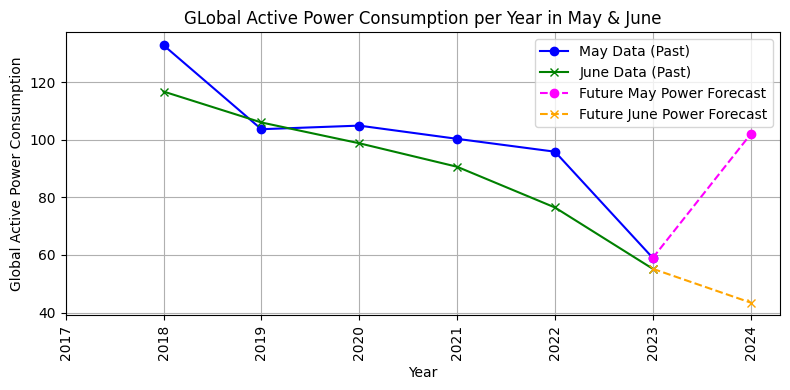

In [128]:
plt.figure(figsize=(8, 4))

plt.plot(power_per_year_may.index, power_per_year_may.values, marker='o', color = 'blue', label = 'May Data (Past)')
plt.plot(power_per_year_june.index, power_per_year_june.values, marker='x', color = 'green', label = 'June Data (Past)')
plt.plot([power_per_year_may.index[-1], power_per_year_may_future.index[0]], [power_per_year_may.values[-1], power_per_year_may_future.values[0]], marker='o', linestyle='--', color='magenta', label='Future May Power Forecast')
plt.plot([power_per_year_june.index[-1], power_per_year_june_future.index[0]], [power_per_year_june.values[-1], power_per_year_june_future.values[0]], marker='x', linestyle='--', color='orange', label='Future June Power Forecast')
plt.title('GLobal Active Power Consumption per Year in May & June', fontsize = 12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Global Active Power Consumption', fontsize=10)
x_tick_range = range(2017,2025,1)
plt.xticks(x_tick_range, rotation = 90, fontsize=10)
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()